#Exercise:#

1.Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)

2.Perform a similar alanlaysis as above on this dataset with the following sections:

  * High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
  * Explain our objective.
  * Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand  which features are useful towards classification.
  *Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
  * Write your observations in english as crisply and unambigously as possible. Always quantify your results.

#Objective:#
###About the dataset:###
Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer.

The objective associated with the dataset is to classify patients who had underwent for the surgery for the breast cancer into class labels- survived and not survived.

Attribute Information:

  * Age of patient at time of operation (numerical)
  * Patient's year of operation (year - 1900, numerical)
  * Number of positive axillary nodes detected (numerical):https://en.wikipedia.org/wiki/Positive_axillary_lymph_node#:~:text=A%20positive%20axillary%20lymph%20node,whether%20cancer%20cells%20are%20present.
  * Survival status (class attribute)

  * Survival status 1 = the patient survived 5 years or longer
  * Survival status 2 = the patient died within 5 year



In [61]:
import pandas as pd              # Data analysis and manipulation
import numpy as np               # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns            # Data visualization

import warnings
warnings.filterwarnings('ignore')

In [62]:
#load dataset
df = pd.read_csv('haberman.csv')
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [63]:
#To know the features/column name

df.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [64]:
# Number of rows(data-points) and columns(features)

df.shape

(305, 4)

In [65]:
#Lets rename the column for better understanding and to get clear idea from dataset

df.columns = ['age', 'year_of_operation', 'axillary_nodes_detected', 'survival_status']


In [66]:
df.head(3)

,age,year_of_operation,axillary_nodes_detected,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1


In [67]:
df.tail(3)

,age,year_of_operation,axillary_nodes_detected,survival_status
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


Before going further we need to check whether the dataset is balanced or imbalnced as they need slightly different data analysis comapred to a balanced one.

In [68]:
df['survival_status'].value_counts()

1    224
2     81
Name: survival_status, dtype: int64

Clearly it is an imbalanced dataset as the number of data-points for both of the class are significantly different.

In [69]:
#To know about the data summary and check for null values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      305 non-null    int64
 1   year_of_operation        305 non-null    int64
 2   axillary_nodes_detected  305 non-null    int64
 3   survival_status          305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


There is no null values in the dataset.

In [70]:
#Get the statistical summary of the dataset

df.describe()

,age,year_of_operation,axillary_nodes_detected,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#Univariate Analysis(pdf, cdf, boxplot and violin plot)#

Univariate Analysis major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

###PDF(Probability Density Function)###


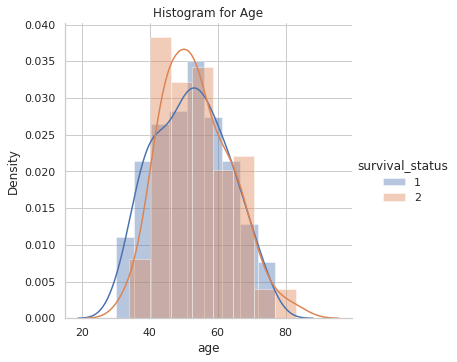

In [71]:
# Here, we are using age feature to generate pdf()
# pdf: smoothed form of histogram
# pdf basically shows, how many of points lies in some interval

sns.FacetGrid(df,hue='survival_status',size=5).map(sns.distplot,'age').add_legend()
plt.title('Histogram for Age')
plt.ylabel('Density')
plt.show()



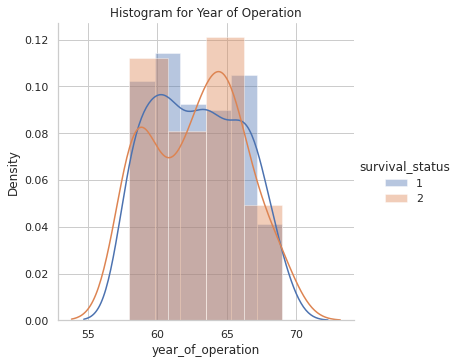

In [72]:
sns.FacetGrid(df,hue='survival_status',size=5).map(sns.distplot,'year_of_operation').add_legend()
plt.title('Histogram for Year of Operation')
plt.ylabel('Density')
plt.show()


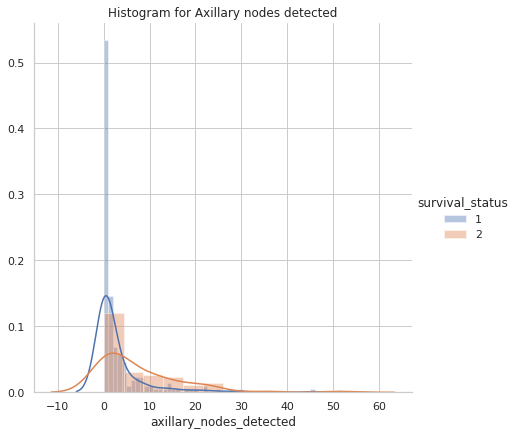

In [73]:
sns.FacetGrid(df, hue = 'survival_status', size = 6).map(sns.distplot, 'axillary_nodes_detected').add_legend()
plt.title('Histogram for Axillary nodes detected')
plt.show()

##Observation:##
1.In all the plots the features are overlapping each other massively to each class for all the three features.

2.Roughly we can say that 55% people survived who had 0-5 Axillary nodes detected and around 12% people died as well.


###CDF(Cummulative Distributed Function)###

[0.01044833 0.02279635 0.02659574 0.01994681 0.03514438 0.03514438
 0.01994681 0.0237462  0.01329787 0.00569909]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


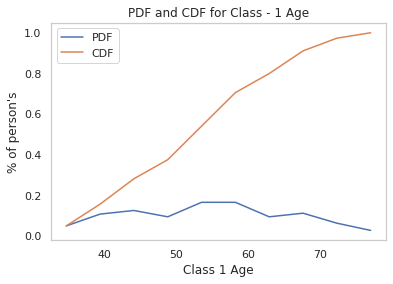

In [74]:
# Cumulative sum of area under curve upto gives you cdf
# cdf gives you cummulative probability associated with a function

class_one = df[df["survival_status"] == 1]     #Class 1 means survived
class_two = df[df["survival_status"] == 2]     #Class 2 means not survived

counts,bin_edges = np.histogram(class_one['age'],bins=10,density=True)
print(counts)
print(bin_edges)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.title('PDF and CDF for Class - 1 Age')
plt.xlabel('Class 1 Age')
plt.ylabel("% of person's")
plt.legend()
plt.grid()
plt.show()


##Observation:##

From PDF, we can say that most of the people who belong to class 1(survived more than 5 years) belong to the age group of 50 to 60 years.

From CDF, we can say that 80% of patient in class 1 are under the age of around 63.

All patient of class 1 had age under 80(or 77-78) years.

[0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


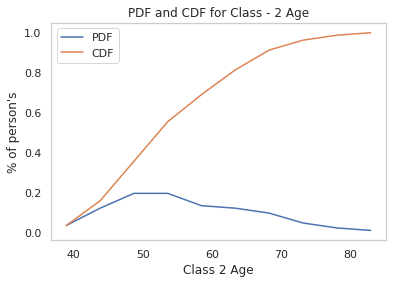

In [75]:
# print(class_two)

counts,bin_edges = np.histogram(class_two['age'],bins=10,density=True)
print(counts)
print(bin_edges)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.title('PDF and CDF for Class - 2 Age')
plt.xlabel('Class 2 Age')
plt.ylabel("% of person's")
plt.legend()
plt.grid()
plt.show()


##Observation:##

From PDF, we can say that most of the people who belong to class 2(survived more than 5 years) belong to the age group of 48 to 60 years.Compared to plot of class 1,there is not much difference as most people who survived were age group of 50 to 60 years.

From CDF, we get that 80% patient age was slightly less than 65 years but more than 60 years.(Similar to plot of class 1)

Patients in class 2 had age more than 80 years.



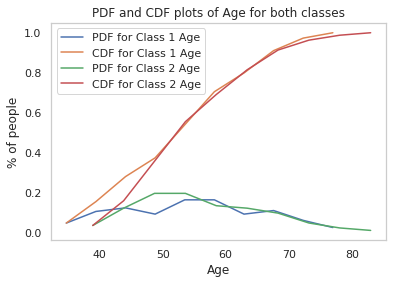

In [76]:
# Plotting PDF and CDF of Age for both class 1 as well as class 2 in the same plot
counts,bin_edges = np.histogram(class_one['age'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF for Class 1 Age')
plt.plot(bin_edges[1:],cdf,label='CDF for Class 1 Age')
plt.title('PDF and CDF plots of Age for both classes')
plt.xlabel('Age')
plt.ylabel('% of people')

counts,bin_edges = np.histogram(class_two['age'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF for Class 2 Age')
plt.plot(bin_edges[1:],cdf,label='CDF for Class 2 Age')
plt.legend()
plt.grid()
plt.show()



##Observation:##

It is difficult to distinguish the two classes on the basis of Age.
As the plots for both classes are overlapping almost.

[0.17045455 0.0974026  0.09334416 0.06493506 0.08928571 0.08928571
 0.06087662 0.08928571 0.08522727 0.06899351]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


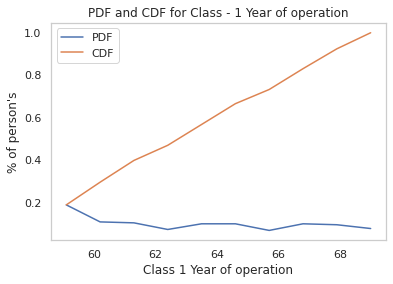

In [77]:
# For class-1 (patients who survived for more than 5 yrs): PDF and CDF for Year of Operation
counts,bin_edges = np.histogram(class_one['year_of_operation'],bins=10,density=True)
print(counts)
print(bin_edges)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.title('PDF and CDF for Class - 1 Year of operation')
plt.xlabel('Class 1 Year of operation')
plt.ylabel("% of person's")
plt.legend()
plt.grid()
plt.show()



[0.23569024 0.04489338 0.03367003 0.07856341 0.08978676 0.08978676
 0.14590348 0.06734007 0.04489338 0.07856341]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


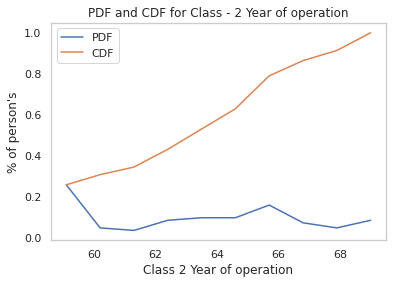

In [78]:
# For class-2 (patients who could not survive for 5 yrs): PDF and CDF for Year of Operation
counts,bin_edges = np.histogram(class_two['year_of_operation'],bins=10,density=True)
print(counts)
print(bin_edges)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.title('PDF and CDF for Class - 2 Year of operation')
plt.xlabel('Class 2 Year of operation')
plt.ylabel("% of person's")
plt.legend()
plt.grid()
plt.show()



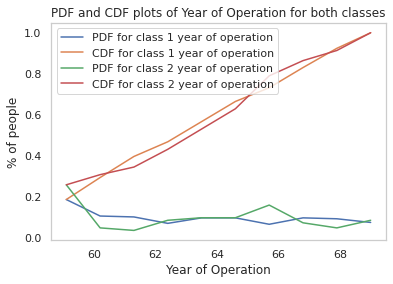

In [79]:
# Plotting PDF and CDF for Year of Operations for both class-1 and class-2 in the same plot

counts,bin_edges = np.histogram(class_one['year_of_operation'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF for class 1 year of operation')
plt.plot(bin_edges[1:],cdf,label='CDF for class 1 year of operation')

plt.title('PDF and CDF plots of Year of Operation for both classes')
plt.xlabel('Year of Operation')
plt.ylabel('% of people')

counts,bin_edges = np.histogram(class_two['year_of_operation'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF for class 2 year of operation')
plt.plot(bin_edges[1:],cdf,label='CDF for class 2 year of operation')

plt.legend()
plt.grid()
plt.show()

##Observation:##

When we plot individual plots for classes and combined plots for the year of operation,we cannot derive any kind of classification rules using year of operation feature alone.

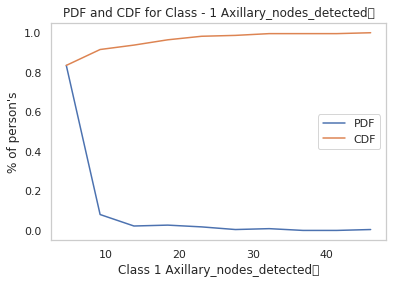

In [80]:
# For class-1 (patients who survived for more than 5 yrs): PDF and CDF for Axillary nodes detected

counts,bin_edges = np.histogram(class_one['axillary_nodes_detected'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.title('PDF and CDF for Class - 1 Axillary_nodes_detected	')
plt.xlabel('Class 1 Axillary_nodes_detected	')
plt.ylabel("% of person's")
plt.legend()
plt.grid()
plt.show()




##Observation:##

From CDF, we can say that 80% of the patients were detected with less than 3-4 axillary nodes.

From PDF, we can say that most of the patients had Axillary nodes detected value less than 10.

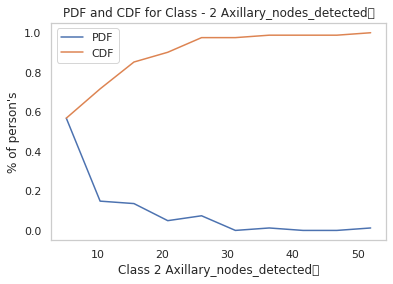

In [81]:
# For class-2 (patients who could not survive for 5 yrs): PDF and CDF for Axillary nodes detected

counts,bin_edges = np.histogram(class_two['axillary_nodes_detected'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.title('PDF and CDF for Class - 2 Axillary_nodes_detected	')
plt.xlabel('Class 2 Axillary_nodes_detected	')
plt.ylabel("% of person's")
plt.legend()
plt.grid()
plt.show()


##Observation:##

From PDF, we can say that most of the patients had Axillary nodes detected value less than 10 which is similar to plot of class 1.

From the CDF, 80% of the patients were detected with less than (atleast) 15 axillary nodes while class 1 has 80% of the patients less than 5 axillary nodes.

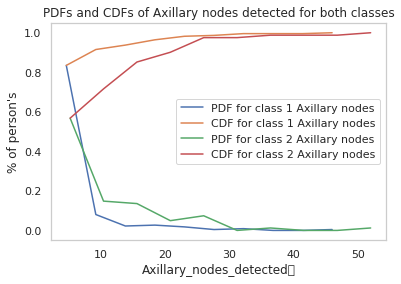

In [82]:
# Plotting the PDFs and CDFs of Axillary nodes detected for both the classes-1 and 2

counts,bin_edges = np.histogram(class_one['axillary_nodes_detected'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF for class 1 Axillary nodes')
plt.plot(bin_edges[1:],cdf,label='CDF for class 1 Axillary nodes')

counts,bin_edges = np.histogram(class_two['axillary_nodes_detected'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF for class 2 Axillary nodes')
plt.plot(bin_edges[1:],cdf,label='CDF for class 2 Axillary nodes')
plt.title('PDFs and CDFs of Axillary nodes detected for both classes')
plt.xlabel('Axillary_nodes_detected	')
plt.ylabel("% of person's")
plt.legend()
plt.grid()
plt.show()

##Observation:##

From PDF, 80% of patients had detected axillary nodes < 5 for class 1 while 60% of patients had axillary nodes < 5 for class2.

PDF for the both classes is overlapping and any classification or conclusion made from this would be full of errors.

#Box Plots#

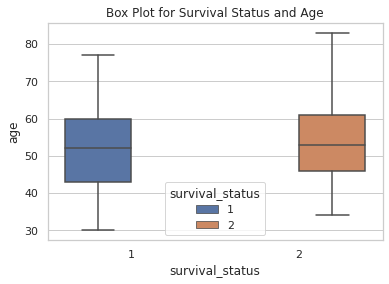

In [83]:
# boxplot gives you the statistical summery of data
# Rectangle represent the 2nd and 3rd quartile 
# The horizontal line inside box represents median

sns.set_theme(style="whitegrid")
sns.boxplot(x='survival_status',y='age',data=df,hue='survival_status').set_title('Box Plot for Survival Status and Age')
plt.show()

##Observation:##

For class 1: Age=60 is the 75th percentile means 75% of the datapoints are of age less than 60 who survived for more than 5 years.

50th percentile is around 52-53(less than 55) while 25th percentile value is around 42-43(less than 45).

Most of the datapoints lie between 30 and 78(i.e within the whiskers).

For class - 2: 75th percentile is little more than 60 (looks like 61 or 62).

50th percentile is almost the same value as the 50th percentile of class 2. 25th percentile is some value more than 45. 

Most of the datapoints lie within 82 (or 83, less than 85) and around 35 (ie, within the whiskers).

Class 1 boxplot has more inter-quartile range than class 2.

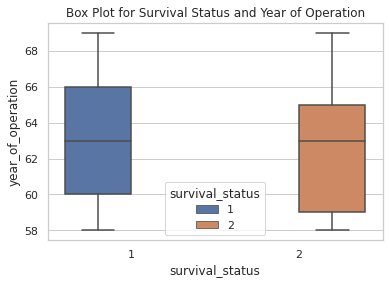

In [84]:
sns.boxplot(x='survival_status',y='year_of_operation',data=df,hue='survival_status')
plt.title('Box Plot for Survival Status and Year of Operation')
plt.show()

##Observation:##

For class - 1: 75th percentile is the year 1966. That is, 75% of the people survived for more than 5 years underwent surgery before 1966. 
1963 is the 50th percentile year of percetile and 25% of the patients who survived for more than 5 years were operated before 1960.

For class - 2:Those who did not survive, 75% of them were operated before 1965.
This class has the same 50th percentile as class - 1- 1963, ie, 50% of the people who did not survive were operated before 1963. 25th percentile is year 1959.


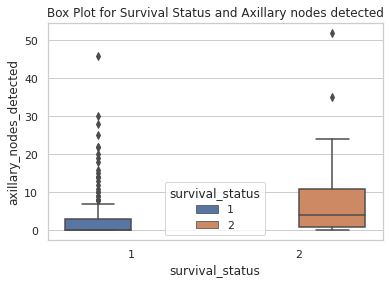

In [85]:
sns.boxplot(x='survival_status',y='axillary_nodes_detected',data=df,hue='survival_status')
plt.title('Box Plot for Survival Status and Axillary nodes detected')
plt.show()

For class-1:We find that there are quite a number of outliers in the value of Axillary nodes detected feature.
75th percentile is somewhere around 3-4,that is 75% of the patients who underwent surgery and survived for more than 5 years had less than 5 axillary nodes.Moreover,since the top whisker is below 10,so most of the survivors had less than 10 axillary nodes detected.

But we didn't get the 3 lines for class 1 boxplot which we normally get.So lets find the 50th percentile(median) and 25th percentile.

In [86]:
print(np.median(class_one['axillary_nodes_detected']))

print(np.percentile(class_one['axillary_nodes_detected'],25))


0.0
0.0


In [87]:
# Let's also check the mean
print(np.mean(class_one['axillary_nodes_detected']))

2.799107142857143


##Observation:##

From boxplot for class-1, we find that the 25th as well as 50th percentile (median), both are zero.
So we can say that 50% patients in class-1 who survived for more than 5 years after surgery had 0 axillary nodes detected.
Moreover, the deviation of mean of the values from the median of Axillary node detections of class - 1 patients show the presence of outliers.

For class - 2: 75th percentiles is greater than 10 (looks like 12). 50th percentile is slighly more than the 75th percentile of class-1, around 5. This means that 50% of the people who did not survive had number of node detections more than 5. 

This is also not a reasonable base to make a rule on as then, we shall get 50% class-2 labels which we shall directly miss. Besides, the upper whisker of class-1 box plot is around 8. So a rule like if axillary_nodes_detected > 5 => class-2 would cause class-1 patients to be labelled as class-2.However, above 8 (upper whisker of class - 1 box plot) we see a lot of datapoints that were marked as outliers for class - 1.
Based on what kind of role they play in making prediction, we can make rule like of axillary nodes detected > 8 and axillary nodes detected < 25, then class-2 while ignoring outliers. 

#Violin Plots#

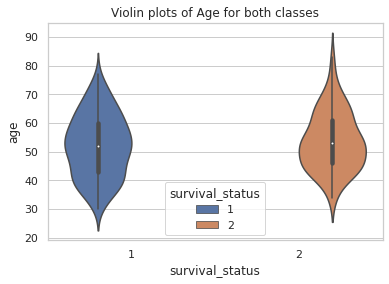

In [88]:
# The violin plot shows the full distribution of the data.
# It is combination of box plot and histogram
# central dot represents median

sns.violinplot(x='survival_status',y='age',data=df,hue='survival_status').set_title('Violin plots of Age for both classes')
plt.show()

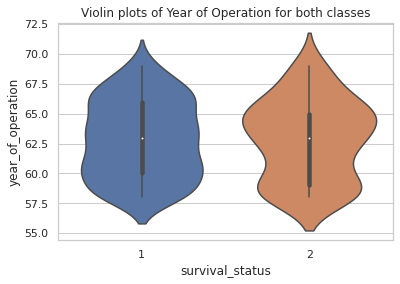

In [89]:
sns.violinplot(x = 'survival_status', y = 'year_of_operation', data = df)
plt.title('Violin plots of Year of Operation for both classes')
plt.show()

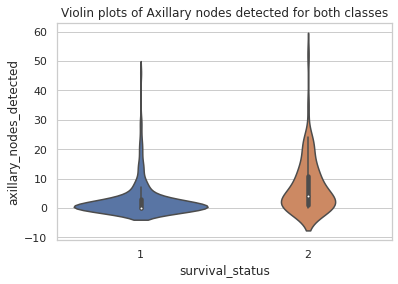

In [90]:
sns.violinplot(x = 'survival_status', y = 'axillary_nodes_detected', data = df)
plt.title('Violin plots of Axillary nodes detected for both classes')
plt.show()

##Observaton##

Comparing to the boxplots,we get the same observation from the violin plots.PDFs are also similar to the ones we obtained while plotting the histograms.We could have used violin plots instead of ploting histogram and boxplots separately.

#**Bivariate** **Analysis**:#

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between *them*

##Scatter Plots##

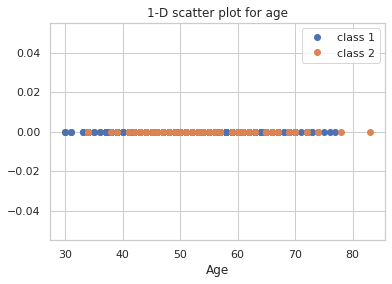

In [97]:
# 1-D sactter plot
plt.plot(class_one['age'],np.zeros_like(class_one['age']),'o',label='class 1')
plt.plot(class_two['age'],np.zeros_like(class_two['age']),'o',label='class 2')
plt.xlabel('Age')
plt.title("1-D scatter plot for age")
plt.legend()
plt.show()

##Observations:##

Many person died whose age was between 41-70.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


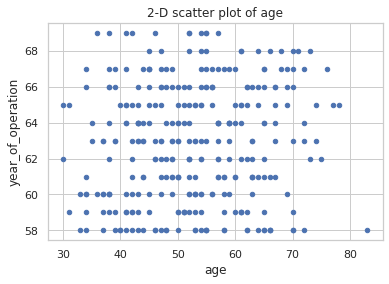

In [100]:
# 2-d scatter plot

df.plot(kind='scatter',x= 'age', y='year_of_operation')
plt.title("2-D scatter plot of age")
plt.show()

##Observation:##

Years of Operation varies from 1958 to 1967 Age varies from 30 to 85.This plot doesn't serve anything other than some scattered blue line and range of values.

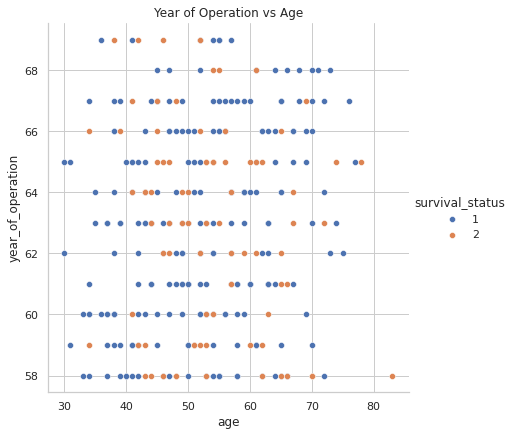

In [105]:
# 2-D Scatter plot with color-coding for each class.

# Seaborn Scatter plot-1. Age and Year of Operation

sns.FacetGrid(df,hue='survival_status',size=6).map(sns.scatterplot,'age','year_of_operation').add_legend()
plt.title('Year of Operation vs Age')
plt.show()

##Observation:##

We can't separate the two classes i.e we are unable to find any decision boundary that can separate the two classes neither linear nor curves.

###Conclusion###

Age and Years of Operation are insufficient to take any kind of classification decision for the dataset

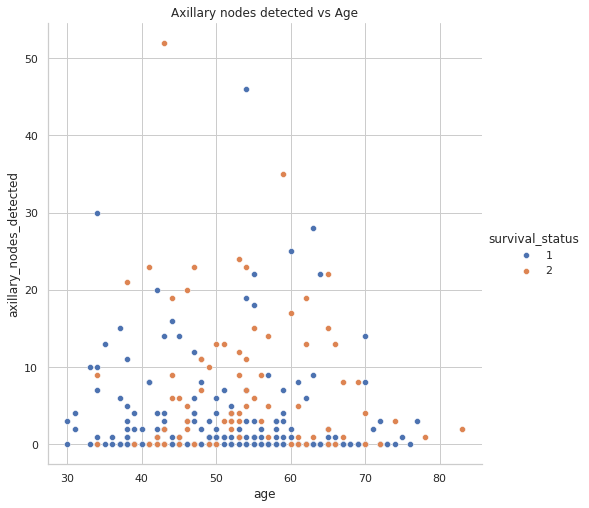

In [110]:
# Seaborn Scatter plot-2. Age and Axillary nodes detected

sns.FacetGrid(df,hue='survival_status',size=7).map(sns.scatterplot,'age','axillary_nodes_detected').add_legend()
plt.title('Axillary nodes detected vs Age')
plt.show()

##Observation:##
Class label(survived or not survived) is not separable.

0-5 axillary_node_detected person survived and died as well but the died ratio is less than survive ratio.

In [109]:
df['axillary_nodes_detected'].value_counts()[:10]

0    136
1     40
2     20
3     20
4     13
6      7
7      7
8      7
5      6
9      6
Name: axillary_nodes_detected, dtype: int64

##Obs. & Conclusion:##
Since, most of the points on the above plot have value for 'Axillary nodes detected' as 0s and 1s, most of the datapoints have value of 'Axillary nodes detected' as 0 and 1 in the df(0 has more frequency of occurrence than 1).

After age 70, the number of axillary nodes never crosses 5.

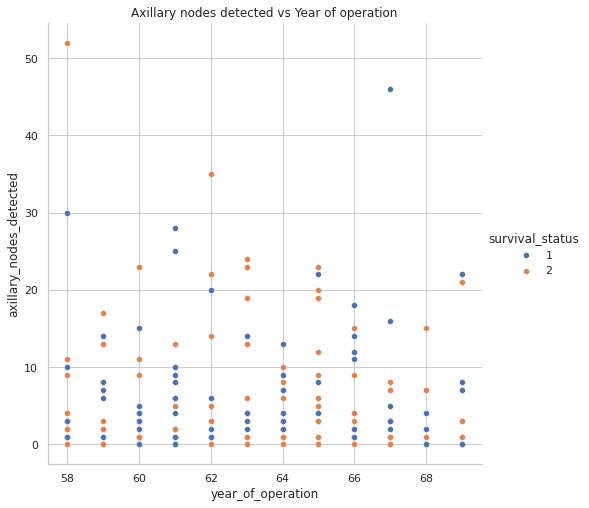

In [112]:
# Seaborn Scatter plot-3. Year of Operation and Axillary nodes detected

sns.FacetGrid(df,hue='survival_status',size=7).map(sns.scatterplot,'year_of_operation','axillary_nodes_detected').add_legend()
plt.title('Axillary nodes detected vs Year of operation')
plt.show()

##Observation:##
Apart of range of values for different age groups, not much information can be gained.

No decision boundary possible.

#Pair-plots#



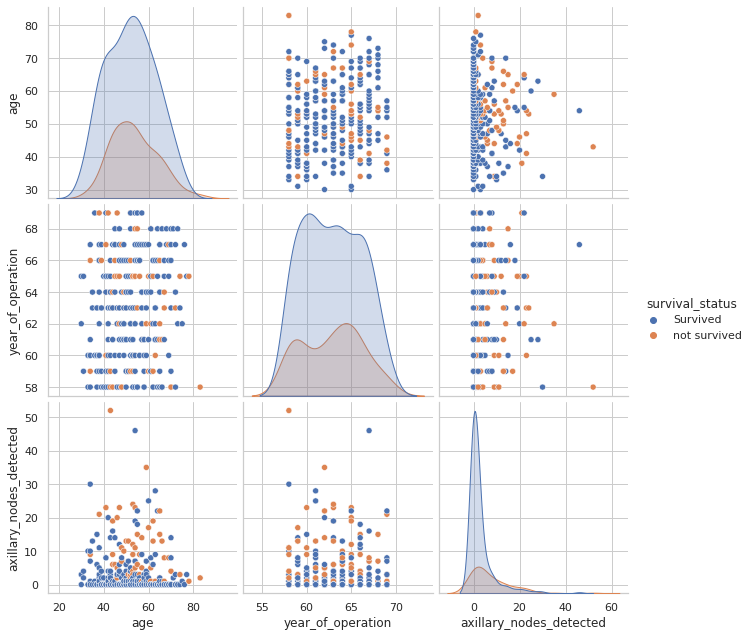

In [113]:
# Since the class label is also numerical, pairplot() plots pairplots corresponding to 'Survival Status' as well.
# Therefore, we need to make our program avoid from doing this. We either can change the labels in Survival Status to string.

# Converting values of Survival Status into string type
df['survival_status'] = df['survival_status'].apply(lambda x:'Survived' if x==1 else 'not survived')

# We use pair plot where the dimenstionality of data is less.
#Here we have only 4 dimension,so we can use pairplot.

sns.pairplot(df,hue='survival_status',size=3)
plt.show()

##Observation and conclusions:##

No two features seems to be able to distinguish between the two classes beacause of too much overlapping.
In operation_year, 60-65 more person died who has less than 6 axillary_nodes_detected.


Hence, this plot is not much informative in this case.

#Conclusion:#

* The given dataset is imbalenced as it does not contains euqal number of data-points for each class.

* The given dataset is not linearly seprable form each class,there is too much overlapping.

* Axillary nodes gives some intution.


